# Time series of mortality during evolution experiment
Plots and analyzes the mortality rate data based on CFU counts taken over the course of the evolution experiment.

In [97]:
path = "/Users/chrisgraves/Documents/Yeast_data/Evolution Experiment/" #Path of data
cfu = read.csv(paste(path,'cfu_data.csv',sep=""),header=T)
library(rateratio.test,lib.loc = "/Library/Frameworks/R.framework/Versions/3.2/Resources/library/")
library(ggplot2)
library(reshape2)
library(plyr)

head(cfu)
dim(cfu)

,treatment,strain,cfu_before1,cfu_before2,cfu_after1,cfu_after2,vol_before,vol_after,dil_before,dil_after,date,day
1,C,1,123,150,176,156,20,20,10000,110,6082014,2
2,C,2,77,63,68,69,20,20,10000,110,6082014,2
3,C,3,65,82,71,97,20,20,10000,110,6082014,2
4,C,4,103,79,82,85,20,20,10000,110,6082014,2
5,C,5,114,103,131,106,20,20,10000,110,6082014,2
6,C,6,76,55,62,43,20,20,10000,110,6082014,2


[1] 240  12

In [98]:
#Total counts across replicate plates
cfu$cfu_before = rowSums(cbind(cfu$cfu_before1,cfu$cfu_before2))
cfu$cfu_after = rowSums(cbind(cfu$cfu_after1,cfu$cfu_after2))
head(cfu)

#Calculate density (cells/ml)
cfu$density_before = (cfu$cfu_before/(2*cfu$vol_before))*(cfu$dil_before*1000)
cfu$density_after = (cfu$cfu_after/(2*cfu$vol_after))*(cfu$dil_after*1000)

#Calculate mortality rate 
cfu$mortality = 1-((cfu$cfu_after/cfu$cfu_before)*((cfu$vol_before*cfu$dil_after)/(cfu$vol_after*cfu$dil_before)))
head(cfu)

#Calculate confidence intervals on mortality estimates
cfu$SE = sqrt((1/cfu$cfu_before)+(1/cfu$cfu_after))
cfu$mort_upper = 1-exp(log(cfu$cfu_after/cfu$cfu_before)+qnorm(.975)*cfu$SE)*((cfu$vol_before*cfu$dil_after)/(cfu$vol_after*cfu$dil_before))
cfu$mort_lower = 1-exp(log(cfu$cfu_after/cfu$cfu_before)+qnorm(.025)*cfu$SE)*((cfu$vol_before*cfu$dil_after)/(cfu$vol_after*cfu$dil_before))
head(cfu)



#Estimate elapsed time in pathogen generations
    #DETAILS OF PATHOGEN GENERATION CONVERSION
    #Cell density at stationary is ~2*10^8 cells/ml
    #10 ul of stationary phase cells are added to 10 mL fresh media to density of ~2*10^5 cells/ml
    #Cells were grown to a density of ~2*10^7 cells/mL before heat shock
        #This yields an estimate of log2(2*10^7/2*10^5) = 6.6 doublings or generations
    #In controls (which match growth of heat shock lines) 1 ul of cells was added to 
        #10 ml media to get a concentration of ~2*10^2 cells/ml 
    #Cells were grown back to stationary density of ~2*10^8 and cycle repeated
        #This yields an additional log2(2*10^8/2*10^2) = 19.9 generations
        #With rounding, there are approximately 26 generations per heat shock cycle

cfu$gen = (cfu$day/2)*26
cfu$strain = as.factor(cfu$strain)
head(cfu)

,treatment,strain,cfu_before1,cfu_before2,cfu_after1,cfu_after2,vol_before,vol_after,dil_before,dil_after,date,day,cfu_before,cfu_after
1,C,1,123,150,176,156,20,20,10000,110,6082014,2,273,332
2,C,2,77,63,68,69,20,20,10000,110,6082014,2,140,137
3,C,3,65,82,71,97,20,20,10000,110,6082014,2,147,168
4,C,4,103,79,82,85,20,20,10000,110,6082014,2,182,167
5,C,5,114,103,131,106,20,20,10000,110,6082014,2,217,237
6,C,6,76,55,62,43,20,20,10000,110,6082014,2,131,105


,treatment,strain,cfu_before1,cfu_before2,cfu_after1,cfu_after2,vol_before,vol_after,dil_before,dil_after,date,day,cfu_before,cfu_after,density_before,density_after,mortality
1,C,1,123,150,176,156,20,20,10000,110,6082014,2,273,332,68250000,913000,0.9866227
2,C,2,77,63,68,69,20,20,10000,110,6082014,2,140,137,3.5e+07,376750,0.9892357
3,C,3,65,82,71,97,20,20,10000,110,6082014,2,147,168,36750000,462000,0.9874286
4,C,4,103,79,82,85,20,20,10000,110,6082014,2,182,167,45500000,459250,0.9899066
5,C,5,114,103,131,106,20,20,10000,110,6082014,2,217,237,54250000,651750,0.9879862
6,C,6,76,55,62,43,20,20,10000,110,6082014,2,131,105,32750000,288750,0.9911832


,treatment,strain,cfu_before1,cfu_before2,cfu_after1,cfu_after2,vol_before,vol_after,dil_before,dil_after,date,day,cfu_before,cfu_after,density_before,density_after,mortality,SE,mort_upper,mort_lower
1,C,1,123,150,176,156,20,20,10000,110,6082014,2,273,332,68250000,913000,0.9866227,0.08170099,0.9842995,0.9886021
2,C,2,77,63,68,69,20,20,10000,110,6082014,2,140,137,3.5e+07,376750,0.9892357,0.1201754,0.9863768,0.9914947
3,C,3,65,82,71,97,20,20,10000,110,6082014,2,147,168,36750000,462000,0.9874286,0.1129385,0.9843138,0.9899249
4,C,4,103,79,82,85,20,20,10000,110,6082014,2,182,167,45500000,459250,0.9899066,0.1071566,0.9875477,0.9918186
5,C,5,114,103,131,106,20,20,10000,110,6082014,2,217,237,54250000,651750,0.9879862,0.09395586,0.985557,0.9900068
6,C,6,76,55,62,43,20,20,10000,110,6082014,2,131,105,32750000,288750,0.9911832,0.1309862,0.9886026,0.9931795


,treatment,strain,cfu_before1,cfu_before2,cfu_after1,cfu_after2,vol_before,vol_after,dil_before,dil_after,date,day,cfu_before,cfu_after,density_before,density_after,mortality,SE,mort_upper,mort_lower,gen
1,C,1,123,150,176,156,20,20,10000,110,6082014,2,273,332,68250000,913000,0.9866227,0.08170099,0.9842995,0.9886021,26
2,C,2,77,63,68,69,20,20,10000,110,6082014,2,140,137,3.5e+07,376750,0.9892357,0.1201754,0.9863768,0.9914947,26
3,C,3,65,82,71,97,20,20,10000,110,6082014,2,147,168,36750000,462000,0.9874286,0.1129385,0.9843138,0.9899249,26
4,C,4,103,79,82,85,20,20,10000,110,6082014,2,182,167,45500000,459250,0.9899066,0.1071566,0.9875477,0.9918186,26
5,C,5,114,103,131,106,20,20,10000,110,6082014,2,217,237,54250000,651750,0.9879862,0.09395586,0.985557,0.9900068,26
6,C,6,76,55,62,43,20,20,10000,110,6082014,2,131,105,32750000,288750,0.9911832,0.1309862,0.9886026,0.9931795,26


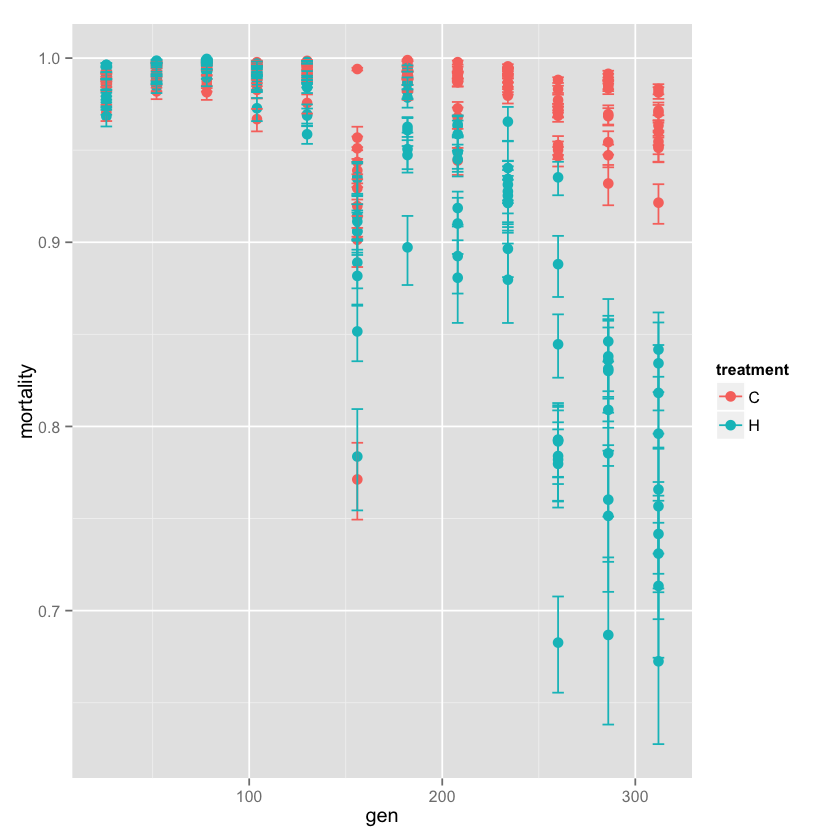

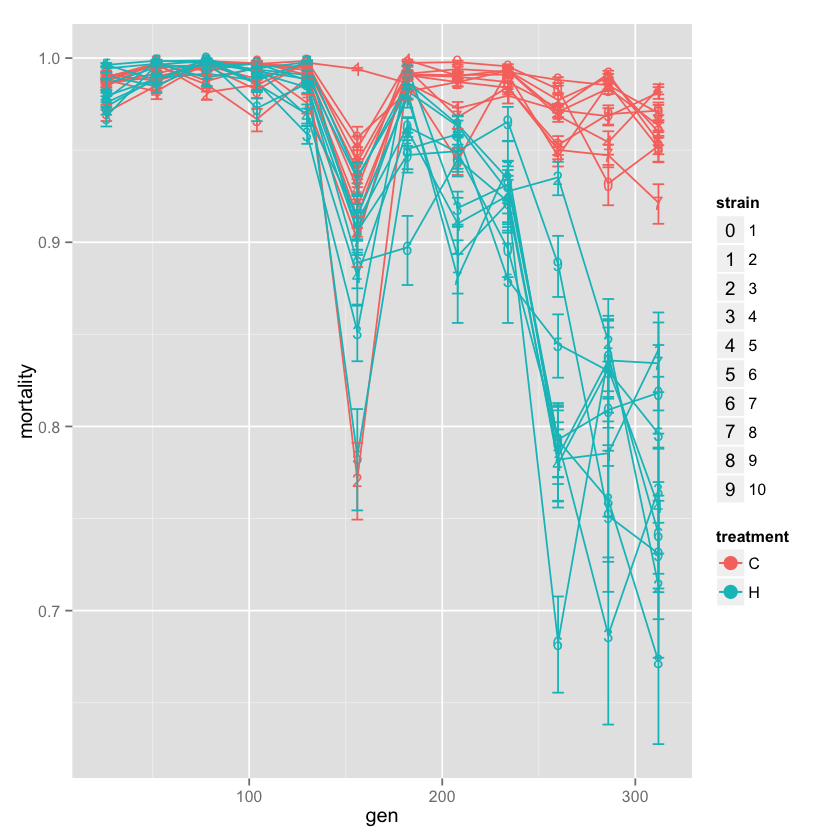

In [69]:
limits = aes(ymax=mort_upper,ymin=mort_lower)
time_series = ggplot(cfu,aes(x=gen,y=mortality,colour = treatment))+
    geom_point(size=3)+
    geom_errorbar(limits,width=6)

time_series

connected = ggplot(cfu,aes(x=gen,y=mortality,colour = treatment,shape=strain))+
    scale_shape_manual(values=48:(48+nlevels(cfu$strain)))+
    geom_point(size=4)+
    geom_line()+
    geom_errorbar(limits,width=6)

connected


,treatment,gen,N,mort,mort_var
1,C,26,10,0.9863519,3.448289e-05
2,C,52,10,0.9919951,3.194528e-05
3,C,78,10,0.9927967,3.420892e-05
4,C,104,10,0.9904413,9.845616e-05
5,C,130,10,0.9929961,4.680322e-05
6,C,156,10,0.9219664,0.003476339


,treatment,gen,N,mort,mort_var,upper,lower
1,C,26,10,0.9863519,3.448289e-05,0.9899914,0.9827123
2,C,52,10,0.9919951,3.194528e-05,0.9954982,0.988492
3,C,78,10,0.9927967,3.420892e-05,0.9964218,0.9891716
4,C,104,10,0.9904413,9.845616e-05,0.9965912,0.9842914
5,C,130,10,0.9929961,4.680322e-05,0.9972362,0.9887559
6,C,156,10,0.9219664,0.003476339,0.9585098,0.8854229


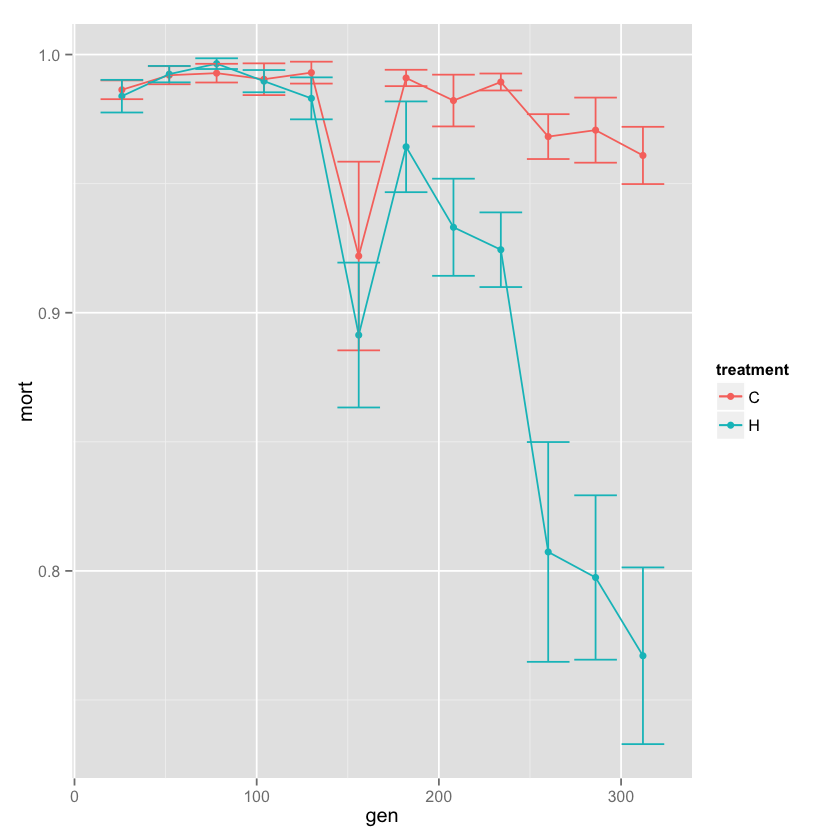

In [99]:
summary = ddply(cfu,~treatment*gen,N=length(mortality),summarise,mort=mean(mortality),mort_var=var(mortality))
head(summary)

summary$upper = summary$mort+qnorm(.975)*sqrt(summary$mort_var)/sqrt(summary$N)
summary$lower = summary$mort+qnorm(.025)*sqrt(summary$mort_var)/sqrt(summary$N)
head(summary)

limits=aes(ymax=upper,ymin=lower)
mean_plot = ggplot(summary,aes(x=gen,y=mort,colour=treatment))+
    geom_point()+
    geom_line()+
    geom_errorbar(limits)
mean_plot

stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.
stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.


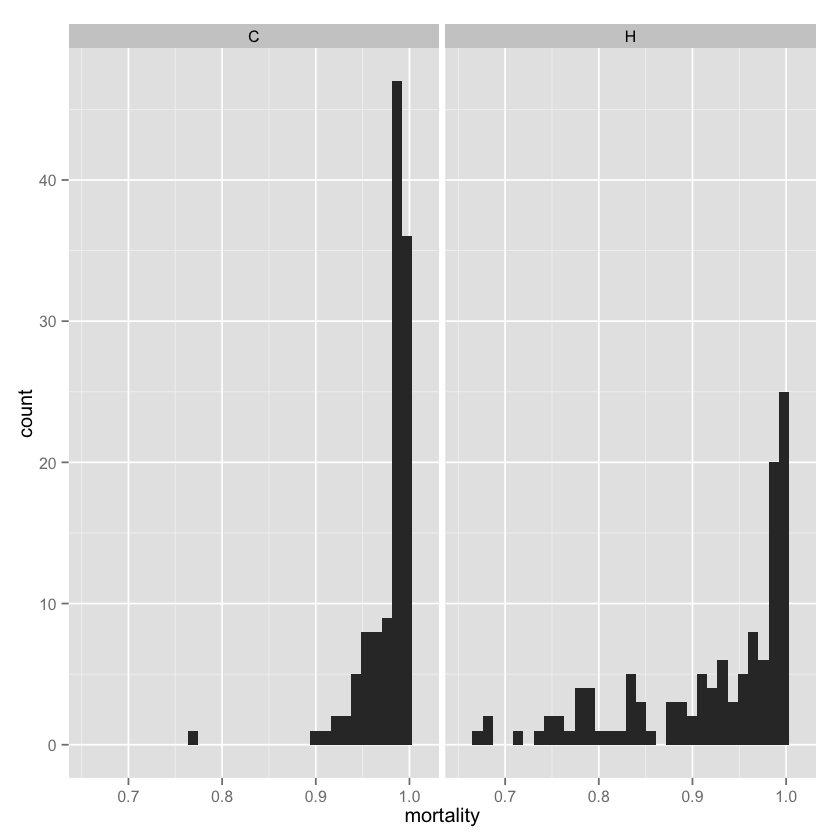

In [100]:
last = subset(cfu,cfu$gen==max(cfu$gen))
mort_hists_end = ggplot(last,aes(x=mortality))+
    geom_histogram()+
    facet_wrap(~treatment)
mort_hists

In [106]:
rep_meas = friedman.test(mortality ~ gen*treatment+Error(treatment),data=cfu)
summary(rep_meas)

ERROR: Error in friedman.test.formula(mortality ~ gen * treatment + Error(treatment), : incorrect specification for 'formula'


               Df Sum Sq Mean Sq F value Pr(>F)    
gen             1 0.3668  0.3668   216.2 <2e-16 ***
treatment       1 0.2091  0.2091   123.2 <2e-16 ***
gen:treatment   1 0.2413  0.2413   142.2 <2e-16 ***
Residuals     236 0.4004  0.0017                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [101]:
class(cfu$mortality)

[1] "numeric"